# Exploratory Data Analysis for Objects

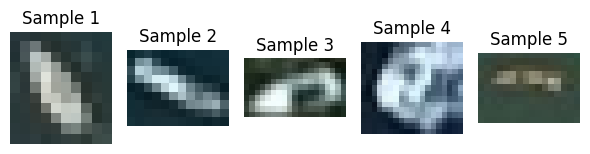

In [7]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm

# Load the images from the directory
path = "C:/Users/20202016/Documents/Master/Master Thesis/Datasets/MasatiV2/MasatiV2Boats"
image_files = [f for f in os.listdir(path) if f.endswith(('.jpg', '.png'))]

# Randomly select 5 images
random_samples = random.sample(image_files, 5)

# Display 5 random samples
plt.figure(figsize=(6, 3))
for i, file in enumerate(random_samples, 1):
    img = cv2.imread(os.path.join(path, file), cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i)
    plt.imshow(img_rgb)
    plt.title(f"Sample {i}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Visualize the size distribution

100%|██████████| 4054/4054 [00:23<00:00, 172.93it/s]


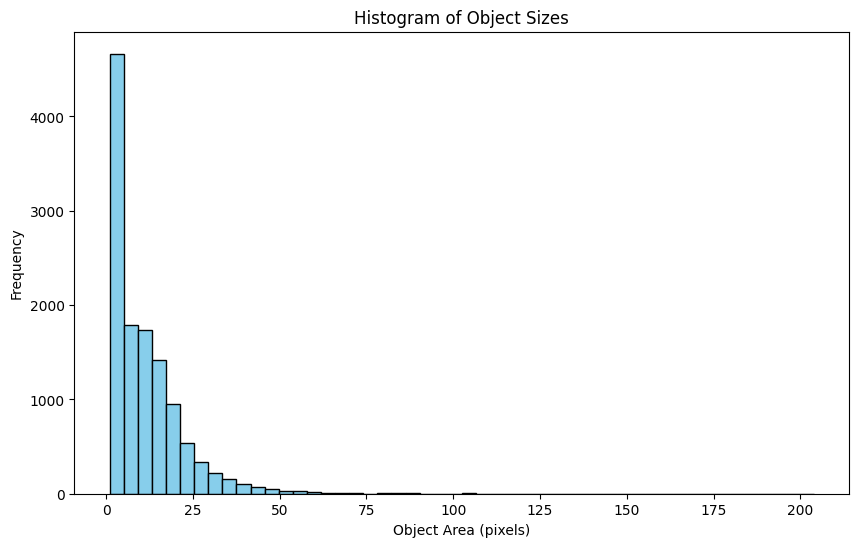

In [3]:
# To store object sizes for each image
object_sizes = []

# Loop through each image and calculate object sizes (area)
for file in tqdm(image_files):
    img_path = os.path.join(path, file)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    obj_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    object_sizes.append(obj_rgb.shape)

# Flatten all the areas into one list
all_object_sizes = [size for sublist in object_sizes for size in sublist]

# Create a histogram of object sizes
plt.figure(figsize=(10, 6))
plt.hist(all_object_sizes, bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of Object Sizes")
plt.xlabel("Object Area (pixels)")
plt.ylabel("Frequency")
plt.show()

## Resolution Heatmap

100%|██████████| 4054/4054 [00:00<00:00, 5819.80it/s]


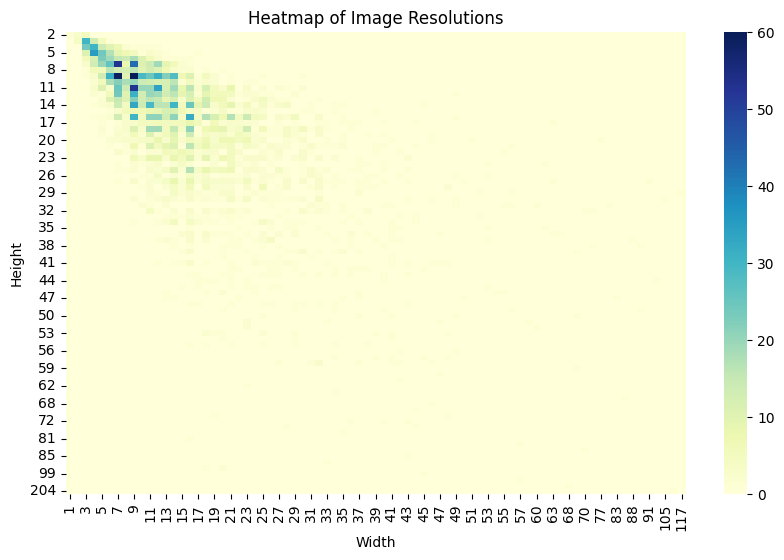

In [12]:
# Load images and get resolutions (height, width)
image_resolutions = []

for file in tqdm(image_files):
    img_path = os.path.join(path, file)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    if img is None:
        continue

    height, width, _ = img.shape
    image_resolutions.append((height, width))

# Convert list of resolutions to a DataFrame to count occurrences of each resolution
resolution_counts = pd.DataFrame(image_resolutions, columns=["Height", "Width"])
resolution_frequency = resolution_counts.groupby(["Height", "Width"]).size().reset_index(name="Frequency")

# Pivot the DataFrame for the heatmap (resolutions as indices)
heatmap_data = resolution_frequency.pivot_table(index="Height", columns="Width", values="Frequency", fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt="d", cbar=True)
plt.title("Heatmap of Image Resolutions")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

## Visualize Resize Operation:

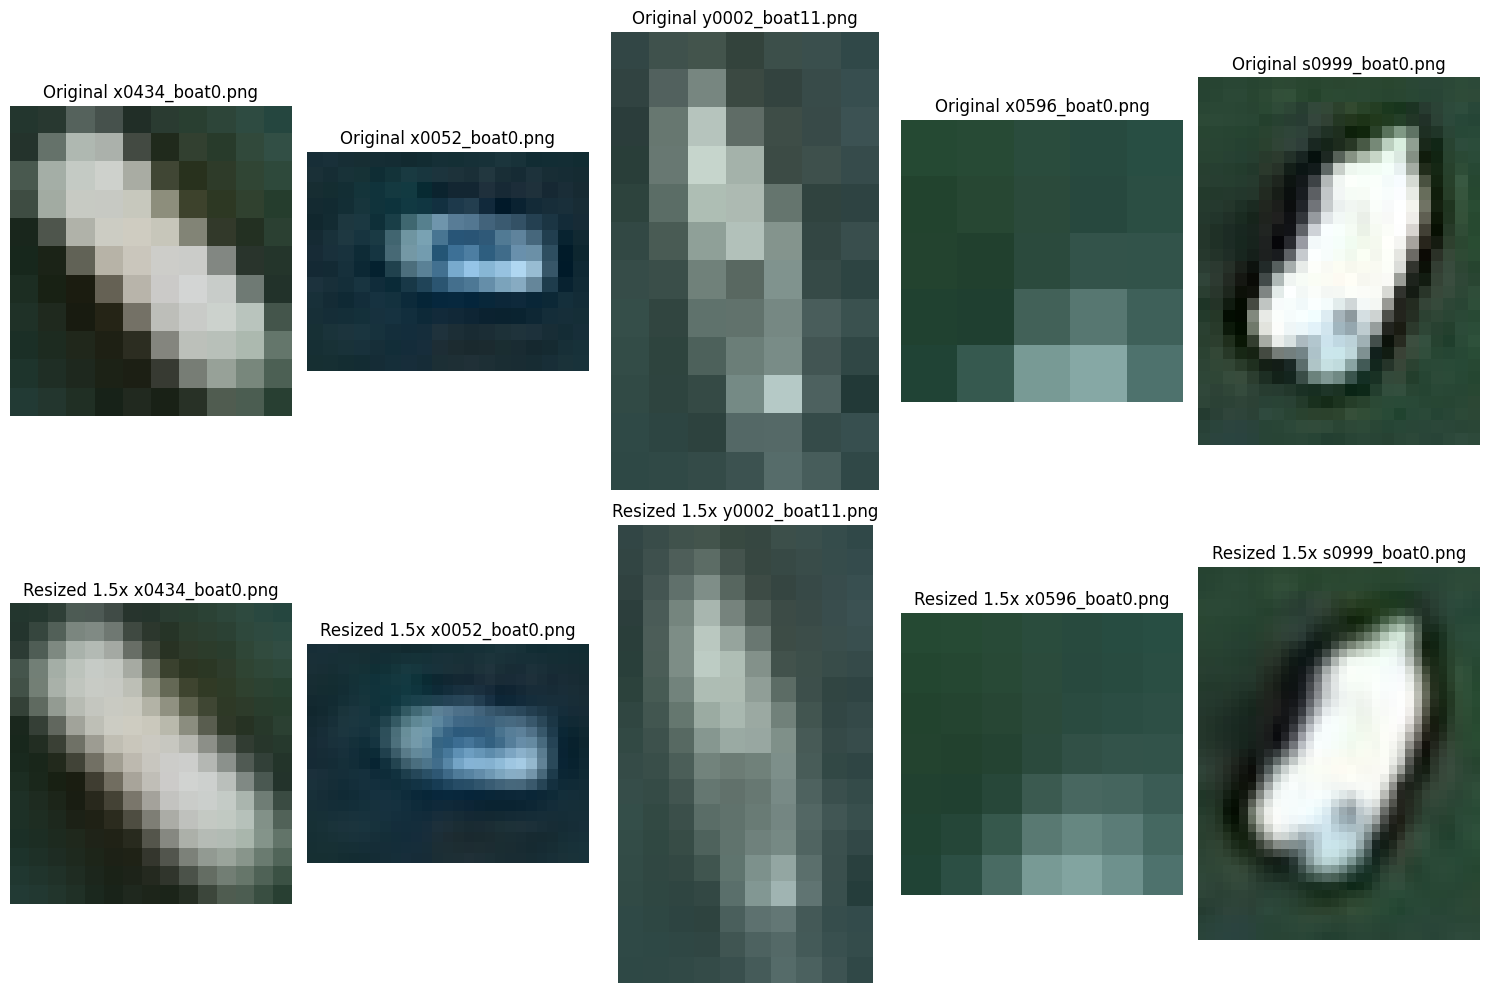

In [16]:
def visualize_resize_effect(path, sample_size=5, scale_factor=1.5):
    """
    Visualize the effect of resizing images by a specified scale factor.

    Args:
        path (str): The directory path containing the images.
        sample_size (int): Number of random images to sample and visualize.
        scale_factor (float): The factor by which to resize the images (1.5 for 50% increase).
    """
    # List all images in the directory
    image_files = [f for f in os.listdir(path) if f.endswith(('.jpg', '.png'))]

    # Randomly sample 5 images
    random_samples = random.sample(image_files, sample_size)

    plt.figure(figsize=(15, 10))

    # Loop through the sampled images and resize them
    for i, file in enumerate(random_samples, 1):
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)

        if img is None:
            continue

        # Resize the image by the scale factor
        height, width, _ = img.shape
        resized_img = cv2.resize(img, (int(width * scale_factor), int(height * scale_factor)))

        # Convert BGR to RGB for proper display in matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resized_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

        # Display the original and resized images side by side
        plt.subplot(2, sample_size, i)
        plt.imshow(img_rgb)
        plt.title(f"Original {file}")
        plt.axis('off')

        plt.subplot(2, sample_size, i + sample_size)
        plt.imshow(resized_rgb)
        plt.title(f"Resized 1.5x {file}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

visualize_resize_effect(path, sample_size=5, scale_factor=1.5)

## Filter Objects

In [8]:
def count_images_in_size_range(path, min_width, max_width, min_height, max_height):
    """
    Calculate the number of images that would be saved after filtering based on input size.

    Args:
        path (str): The directory path containing the images.
        min_width (int): Minimum width of images to include.
        max_width (int): Maximum width of images to include.
        min_height (int): Minimum height of images to include.
        max_height (int): Maximum height of images to include.

    Returns:
        int: The number of images that meet the size criteria.
    """
    image_files = [f for f in os.listdir(path) if f.endswith(('.jpg', '.png'))]
    count = 0

    for file in image_files:
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)

        if img is None:
            continue

        # Get image dimensions (height, width)
        height, width, _ = img.shape

        # Check if the image dimensions are within the specified range
        if min_width <= width <= max_width and min_height <= height <= max_height:
            count += 1

    return count

# Define the directory and size range
min_width = 12
max_width = 64
min_height = 12
max_height = 64

# Call the function to count images within the specified size range
num_images = count_images_in_size_range(path, min_width, max_width, min_height, max_height)

# Print the result
print(f"Number of images that match the size range: {num_images}")

Number of images that match the size range: 1887


## Object Size

We want to decide on an object size that is appropriate for the cloning operation. It seems that smaller objects are more difficult for the algorithm to insert. However, the number of larger images is limited. Let's find the best middle ground. Images can be resized.